<a href="https://colab.research.google.com/github/santoshdhalwalkar/Telecommunication/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#import drive from google
#from google.colab import drive

In [37]:
# mount the drive
#drive.mount("/content/drive")

In [38]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [39]:
 #read the data from google drive
df =pd.read_csv("data/cleanedtelecomunication_df.csv")
df.head()

,BearerId,MSISDNNumber,Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,YoutubeUL_Bytes,YoutubeDL_Bytes,NetflixUL_Bytes,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes
0,1.311450e+19,3.368542e+10,243.504,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,14644405.0,17400892.0,20806551.0,599743023.0,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0
1,1.311450e+19,3.366132e+10,236.570,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,16964908.0,19431593.0,9907089.0,798245704.0,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0
2,1.311450e+19,3.361513e+10,231.780,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,13154981.0,7438887.0,9887128.0,192095344.0,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0
3,1.311450e+19,3.366495e+10,230.839,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,14454366.0,3334865.0,1530332.0,359872820.0,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0
4,7.349880e+18,3.366403e+10,238.915,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,21457678.0,23039020.0,13958301.0,604428354.0,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0


In [40]:
# Calculate Sessions Frequency by grouping by 'MSISDNNumber' and counting 'BearerId'
sessions_frequency = df.groupby('MSISDNNumber')['BearerId'].count().reset_index()

# Rename the column for clarity
sessions_frequency.columns = ['MSISDNNumber', 'session_frequency']

# Display the result
print(sessions_frequency)

       MSISDNNumber  session_frequency
0      3.360100e+10                  1
1      3.360100e+10                  1
2      3.360100e+10                  1
3      3.360101e+10                  1
4      3.360101e+10                  1
...             ...                ...
56669  3.378996e+10                  1
56670  3.378996e+10                  1
56671  3.378997e+10                  1
56672  3.378998e+10                  1
56673  3.379000e+10                  1

[56674 rows x 2 columns]


In [41]:
# Concatenate DataFrames
df = pd.concat([df, sessions_frequency],axis=1)

In [42]:
df

,BearerId,MSISDNNumber,Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,NetflixUL_Bytes,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,MSISDNNumber,session_frequency
0,1.311450e+19,3.368542e+10,243.504,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,20806551.00,599743023.0,556406594.0,43336429.0,7682779.00,3.820483e+06,318297673.0,2.710989e+06,3.360100e+10,1.0
1,1.311450e+19,3.366132e+10,236.570,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,9907089.00,798245704.0,757526492.0,40719212.0,11758420.00,1.716480e+06,290582586.0,1.025092e+07,3.360100e+10,1.0
2,1.311450e+19,3.361513e+10,231.780,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,9887128.00,192095344.0,139043208.0,53052136.0,753238.00,1.493262e+07,350039548.0,1.496782e+07,3.360100e+10,1.0
3,1.311450e+19,3.366495e+10,230.839,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,1530332.00,359872820.0,329159454.0,30713366.0,17917894.00,1.168476e+07,495376623.0,1.362536e+06,3.360101e+10,1.0
4,7.349880e+18,3.366403e+10,238.915,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,13958301.00,604428354.0,546747900.0,57680454.0,1114842.00,9.207067e+06,624397048.0,8.432981e+06,3.360101e+10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65566,7.277830e+18,3.365069e+10,81.230,32.0,0.0,52.0,65.0,568730.0,20949.5,526609673.0,...,19678161.00,631804110.0,574175259.0,57628851.0,17883703.00,1.348742e+07,3264510.0,9.197207e+06,NaN,NaN
65567,7.349880e+18,3.366345e+10,97.970,27.0,2.0,23.0,54.0,568730.0,20949.5,626893062.0,...,21293148.00,705783925.0,666648844.0,39135081.0,19350146.00,2.457758e+06,712180387.0,4.735033e+06,NaN,NaN
65568,1.311450e+19,3.362189e+10,98.249,43.0,6.0,43.0,47.0,568730.0,20949.5,553539484.0,...,5065760.00,627698629.0,592786405.0,34912224.0,9963942.00,1.131473e+07,121100856.0,1.339432e+07,NaN,NaN
65569,1.311450e+19,3.361962e+10,97.910,37.0,5.0,34.0,37.0,568730.0,20949.5,352536971.0,...,13172589.00,401522016.0,371895920.0,29626096.0,3322253.00,1.406930e+06,814713113.0,2.529475e+06,NaN,NaN


In [43]:
df = df.T.drop_duplicates().T


In [44]:
# Drop the duplicate column
df = df.loc[:, ~df.columns.duplicated()]

# Drop rows where 'MSISDNNumber1' has NaN values
df = df.dropna(subset=['MSISDNNumber'])

# Display the cleaned DataFrame

In [45]:
# Calculate the median of the 'session_frequency' column
median_session_frequency = df['session_frequency'].median()

# Fill NaN values in the 'session_frequency' column with the median
df['session_frequency'].fillna(median_session_frequency, inplace=True)

# Display the DataFrame after filling NaN values
df

,BearerId,MSISDNNumber,Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,YoutubeDL_Bytes,NetflixUL_Bytes,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency
0,1.311450e+19,3.368542e+10,243.504,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,17400892.0,20806551.00,599743023.0,556406594.0,43336429.0,7682779.00,3.820483e+06,318297673.0,2.710989e+06,1.0
1,1.311450e+19,3.366132e+10,236.570,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,19431593.0,9907089.00,798245704.0,757526492.0,40719212.0,11758420.00,1.716480e+06,290582586.0,1.025092e+07,1.0
2,1.311450e+19,3.361513e+10,231.780,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,7438887.0,9887128.00,192095344.0,139043208.0,53052136.0,753238.00,1.493262e+07,350039548.0,1.496782e+07,1.0
3,1.311450e+19,3.366495e+10,230.839,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,3334865.0,1530332.00,359872820.0,329159454.0,30713366.0,17917894.00,1.168476e+07,495376623.0,1.362536e+06,1.0
4,7.349880e+18,3.366403e+10,238.915,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,23039020.0,13958301.00,604428354.0,546747900.0,57680454.0,1114842.00,9.207067e+06,624397048.0,8.432981e+06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65566,7.277830e+18,3.365069e+10,81.230,32.0,0.0,52.0,65.0,568730.0,20949.5,526609673.0,...,16191667.0,19678161.00,631804110.0,574175259.0,57628851.0,17883703.00,1.348742e+07,3264510.0,9.197207e+06,1.0
65567,7.349880e+18,3.366345e+10,97.970,27.0,2.0,23.0,54.0,568730.0,20949.5,626893062.0,...,13877234.0,21293148.00,705783925.0,666648844.0,39135081.0,19350146.00,2.457758e+06,712180387.0,4.735033e+06,1.0
65568,1.311450e+19,3.362189e+10,98.249,43.0,6.0,43.0,47.0,568730.0,20949.5,553539484.0,...,22660510.0,5065760.00,627698629.0,592786405.0,34912224.0,9963942.00,1.131473e+07,121100856.0,1.339432e+07,1.0
65569,1.311450e+19,3.361962e+10,97.910,37.0,5.0,34.0,37.0,568730.0,20949.5,352536971.0,...,8817106.0,13172589.00,401522016.0,371895920.0,29626096.0,3322253.00,1.406930e+06,814713113.0,2.529475e+06,1.0


##Engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster

In [46]:
from scipy.spatial.distance import euclidean

# Select the relevant columns used in clustering
features = df[['session_frequency', 'Duration_Seconds', 'Total_Data']]

# Check for NaNs or Infs and handle them (e.g., fill with 0 or drop)
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(0, inplace=True)  # Alternatively, you can use features.dropna(inplace=True)

# Define the centroid of the less engaged cluster (cluster 1)
less_engaged_centroid = [0.002972, 0.093462, 0.068495]

# Calculate the Euclidean distance for each user from the less engaged cluster centroid
df['engagement_score'] = features.apply(lambda row: euclidean(row, less_engaged_centroid), axis=1)

# Save the result with engagement scores
output_file_path = 'data/cengagement_scores_simple.csv'
df.to_csv(output_file_path, index=False)

# Output the file path
print("Engagement scores have been saved to:", output_file_path)

Engagement scores have been saved to: data/cengagement_scores_simple.csv


In [47]:
# Load the CSV file with engagement scores
engagement_scores = pd.read_csv('data/cengagement_scores_simple.csv')



In [48]:
engagement_scores.head()

,BearerId,MSISDNNumber,Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,NetflixUL_Bytes,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency,engagement_score
0,1.311450e+19,3.368542e+10,243.504,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,20806551.0,599743023.0,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,1.0,5.997430e+08
1,1.311450e+19,3.366132e+10,236.570,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,9907089.0,798245704.0,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,1.0,7.982457e+08
2,1.311450e+19,3.361513e+10,231.780,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,9887128.0,192095344.0,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,1.0,1.920953e+08
3,1.311450e+19,3.366495e+10,230.839,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,1530332.0,359872820.0,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,1.0,3.598728e+08
4,7.349880e+18,3.366403e+10,238.915,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,13958301.0,604428354.0,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,1.0,6.044284e+08


###  Create engagement_scores dataframe and save it in csv

In [49]:
# Select and display the relevant columns
df_engagement_scores = engagement_scores['engagement_score']



#dataframe to csv
df_engagement_scores.to_csv('data/engagement_scores.csv', index=False)

df_engagement_scores.head()

0    5.997430e+08
1    7.982457e+08
2    1.920953e+08
3    3.598728e+08
4    6.044284e+08
Name: engagement_score, dtype: float64

In [50]:
df_engagement_scores.isnull().sum()


0

#Experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster

In [51]:
# Calculate the centroid for the worst experience cluster (maximum values)
worst_experience_centroid = engagement_scores.max()

# Compute the Euclidean distance from each user to the worst experience cluster
experience_scores = np.linalg.norm(engagement_scores - worst_experience_centroid, axis=1)

# Add the experience scores to the DataFrame
engagement_scores['Experience_Score'] = experience_scores

In [52]:
engagement_scores.head()

,BearerId,MSISDNNumber,Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency,engagement_score,Experience_Score
0,1.311450e+19,3.368542e+10,243.504,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,599743023.0,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,1.0,5.997430e+08,7.200000e+16
1,1.311450e+19,3.366132e+10,236.570,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,798245704.0,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,1.0,7.982457e+08,7.200000e+16
2,1.311450e+19,3.361513e+10,231.780,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,192095344.0,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,1.0,1.920953e+08,7.200000e+16
3,1.311450e+19,3.366495e+10,230.839,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,359872820.0,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,1.0,3.598728e+08,7.200000e+16
4,7.349880e+18,3.366403e+10,238.915,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,604428354.0,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,1.0,6.044284e+08,5.836620e+18


###  Create Experience_Score dataframe and save it in csv

In [53]:
# Select and display the relevant columns
df_experience_Score = engagement_scores['Experience_Score']



#dataframe to csv
df_experience_Score.to_csv('data/experience_Score.csv', index=False)



In [54]:
df_experience_Score.isnull().sum()

0

##  The satisfaction score & report the top 10 satisfied customer

In [55]:
# Calculate the Satisfaction Score as the average of engagement and experience scores
engagement_scores['Satisfaction_Score'] = engagement_scores[['engagement_score', 'Experience_Score']].mean(axis=1)

# Sort the DataFrame by Satisfaction Score in descending order to get the top 10 satisfied customers
top_10_satisfied_customers = engagement_scores.nlargest(10, 'Satisfaction_Score')



In [56]:
# Select and display the relevant columns
df_top_10_satisfied_customers = top_10_satisfied_customers[ 'Satisfaction_Score']
df_top_10_satisfied_customers

59363    3.134480e+18
11404    3.134480e+18
1672     3.134480e+18
5318     3.134480e+18
45918    3.134480e+18
9026     3.134480e+18
2931     3.134480e+18
1015     3.134480e+18
3032     3.134480e+18
11071    3.134480e+18
Name: Satisfaction_Score, dtype: float64

###  Create Satisfaction_Score dataframe and save it in csv

In [57]:
# Select and display the relevant columns
df_Satisfaction_Score = engagement_scores['Satisfaction_Score']



#dataframe to csv
df_Satisfaction_Score.to_csv('data/Satisfaction_Score.csv', index=False)

df_Satisfaction_Score.head()

0    3.600000e+16
1    3.600000e+16
2    3.600000e+16
3    3.600000e+16
4    2.918310e+18
Name: Satisfaction_Score, dtype: float64

In [58]:
df_Satisfaction_Score.isnull().sum()

0

In [59]:
 #read the data from google drive
ss =pd.read_csv("data/Satisfaction_Score.csv")
ss.head()

,Satisfaction_Score
0,3.600000e+16
1,3.600000e+16
2,3.600000e+16
3,3.600000e+16
4,2.918310e+18


In [60]:
 #read the data from google drive
exp =pd.read_csv("data/experience_Score.csv")
exp.head()

,Experience_Score
0,7.200000e+16
1,7.200000e+16
2,7.200000e+16
3,7.200000e+16
4,5.836620e+18


In [61]:
#maindata dataframe to csv
engagement_scores.to_csv('data/telecomdata.csv', index=False)
engagement_scores.head()

,BearerId,MSISDNNumber,Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency,engagement_score,Experience_Score,Satisfaction_Score
0,1.311450e+19,3.368542e+10,243.504,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,1.0,5.997430e+08,7.200000e+16,3.600000e+16
1,1.311450e+19,3.366132e+10,236.570,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,1.0,7.982457e+08,7.200000e+16,3.600000e+16
2,1.311450e+19,3.361513e+10,231.780,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,1.0,1.920953e+08,7.200000e+16,3.600000e+16
3,1.311450e+19,3.366495e+10,230.839,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,1.0,3.598728e+08,7.200000e+16,3.600000e+16
4,7.349880e+18,3.366403e+10,238.915,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,1.0,6.044284e+08,5.836620e+18,2.918310e+18


##Build a regression model

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

#### Define features (X) and target (y)

In [63]:
X = engagement_scores.drop(["Satisfaction_Score"], axis =1 )
y = engagement_scores["Satisfaction_Score"]

#### Split the data into training and testing sets

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
from sklearn.model_selection import cross_val_score
models = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'RMSE (Cross-Validation) '])

In [68]:

# Function to calculate RMSE using cross-validation
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)).mean()
    return rmse

# Function to evaluate the model
def evaluation(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2_square = r2_score(y, y_pred)
    return mae, mse, rmse, r2_square

In [69]:
# Define the regressors
Regressors = [
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

In [70]:

# DataFrame to store all results
all_results = pd.DataFrame({"Actual": y_test})

# DataFrame to store evaluation metrics
metrics_results = []

# Dictionary to store RMSE (CV) results
rmse_cv_results = {}

# Iterate through each regressor, fit the model, make predictions, and evaluate
for name, model in Regressors:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Add predictions to the DataFrame
    all_results[name + ' Predictions'] = y_pred


        # Evaluate the model
    # Evaluate the model
    mae, mse, rmse, r2_square = evaluation(y_test, y_pred)
    rmse_cv_val = rmse_cv(model)
    rmse_cv_results[name] = rmse_cv_val

    print(f"{name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2_square:.2f}")
    print(f"RMSE (CV): {rmse_cv_val:.2f}")
    print("\n")

print("Combined Results:")
print(all_results)

Ridge Results:
MAE: 14024587656081.93
MSE: 254696179240862723537371136.00
RMSE: 15959203590432.16
R² Score: 1.00
RMSE (CV): 20048013969503.38


Decision Tree Results:
MAE: 87152367.59
MSE: 11076230584236628.00
RMSE: 105243672.42
R² Score: 1.00
RMSE (CV): 281414140510540.34


Random Forest Results:
MAE: 769329978955.77
MSE: 7760260127643050241123418112.00
RMSE: 88092338643284.12
R² Score: 1.00
RMSE (CV): 241320320628105.44


Gradient Boosting Results:
MAE: 38198984525907.90
MSE: 1462493211513883189806366720.00
RMSE: 38242557596398.84
R² Score: 1.00
RMSE (CV): 231477647991701.94


Combined Results:
             Actual  Ridge Predictions  Decision Tree Predictions  \
43991  3.600000e+16       3.601257e+16               3.600000e+16   
64302  2.918310e+18       2.918305e+18               2.918310e+18   
17298  3.600000e+16       3.602036e+16               3.600000e+16   
47875  3.600000e+16       3.601336e+16               3.600000e+16   
51077  3.600000e+16       3.601032e+16             

In [71]:
# Plot RMSE (CV) results
models = list(rmse_cv_results.keys())
rmse_values = list(rmse_cv_results.values())

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE (Cross-Validation)')
plt.title('RMSE of Models using Cross-Validation')

Text(0.5, 1.0, 'RMSE of Models using Cross-Validation')

###Given the results, Random Forest seems to be the best model among the four options. Although all models show signs of overfitting with perfect R² scores and high error metrics, Random Forest has the lowest RMSE (CV), suggesting it generalizes slightly better on unseen data compared to the other models.

##Run a k-means (k=2) on the engagement & the experience score.

---



In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

  File "c:\Users\dewan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\dewan\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dewan\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\dewan\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


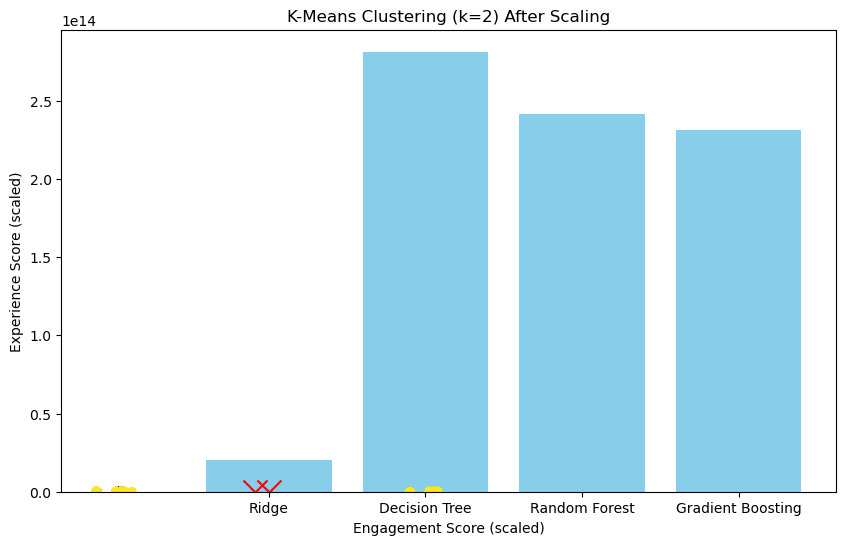

In [73]:
# Selecting the relevant columns
scluster = engagement_scores[['engagement_score', 'Experience_Score']]

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Run k-means with k=2 on the scaled data
kmeans = KMeans(n_clusters=2, random_state=0)
engagement_scores['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=engagement_scores['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')  # cluster centers
plt.xlabel('Engagement Score (scaled)')
plt.ylabel('Experience Score (scaled)')
plt.title('K-Means Clustering (k=2) After Scaling')
plt.show()

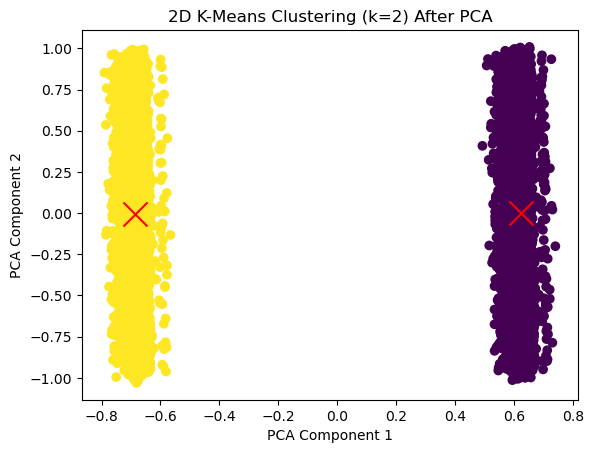

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the relevant columns
scluster = engagement_scores[['engagement_score', 'Experience_Score']]

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA (optional)
pca = PCA(n_components=2)  # Since we have only two features, n_components=2
X_pca = pca.fit_transform(X_scaled)

# Step 3: Run k-means with k=2 on the PCA-transformed data
kmeans = KMeans(n_clusters=2, random_state=0)
engagement_scores['Cluster'] = kmeans.fit_predict(X_pca)


# Step 4: Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=engagement_scores['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')  # cluster centers
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D K-Means Clustering (k=2) After PCA')
plt.show()



1.   Cluster 1 (Purple): If these users have lower engagement and experience scores, they might be at risk of churn or may require targeted interventions to improve their experience and increase their engagement.

2.   Cluster 2 (Yellow): These users are likely satisfied and engaged, representing a more loyal user base. Efforts to maintain or further enhance their experience could help retain this segment.


In [75]:
# Aggregating the average satisfaction & experience score per cluster
average_scores = engagement_scores.groupby('Cluster')[['Satisfaction_Score', 'Experience_Score']].mean()

average_scores

,Satisfaction_Score,Experience_Score
Cluster,,
0,2.921651e+18,5.843301e+18
1,3.815625e+16,7.631250e+16




1.   Cluster 0 appears to be associated with users who are both highly satisfied and have a high experience score.

2.  Cluster 1 might represent users who are relatively satisfied but have a much lower experience score.



In [76]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)

# Load the pickled model
model_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
model_from_pickle.predict(X_test)

array([3.60401349e+16, 2.91827357e+18, 3.60401349e+16, ...,
       3.60401349e+16, 2.91827357e+18, 3.60401349e+16])

In [77]:
from joblib import Parallel, delayed
import joblib


# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')

# Load the model from the file
model_from_joblib = joblib.load('model.pkl')

# Use the loaded model to make predictions
model_from_joblib.predict(X_test)

array([3.60401349e+16, 2.91827357e+18, 3.60401349e+16, ...,
       3.60401349e+16, 2.91827357e+18, 3.60401349e+16])